In [10]:
import sys
import os

import numpy as np

import pyAgrum as gum

%matplotlib inline
from pyAgrum.lib.bn2roc import showROC

In [11]:
bn=gum.loadBN(os.path.join("res","alarm.dsl"))

In [20]:
# generateCSV from a BN 
import pyAgrum.lib.bn2csv as bn2csv
bn2csv.generateCSV(bn,os.path.join("out","learn.csv"),10000,visible=True,with_labels=False)
bn2csv.generateCSV(bn,os.path.join("out","train.csv"),1000,visible=True,with_labels=False)

 out/learn.csv : [ ########################################################### ] 100%
Log2-Likelihood : -151130.31208232854

 out/train.csv : [ ########################################################### ] 100%ut/train.csv : [ #########                                                   ] 15%out/train.csv : [ #################################################           ] 83%out/train.csv : [ ###################################################         ] 87%
Log2-Likelihood : -15303.14553395708



-15303.14553395708

# Learning a BN from learn.csv

In [21]:
# Learning a BN from the database
learner=gum.BNLearner(os.path.join("out","train.csv"))

# # Hill-Climbing
learner.useGreedyHillClimbing()
bn2=learner.learnBN()
bn2.setProperty("name","Learned_{0}s".format(learner.currentTime()))

In [22]:
import pyAgrum.lib.notebook as gnb
gnb.showBN(bn2,size="8",format="svg")

In [23]:
print(bn2.names())

['ANAPHYLAXIS', 'TPR', 'DISCONNECT', 'LVFAILURE', 'HISTORY', 'FIO2', 'ERRCAUTER', 'ERRLOWOUTPUT', 'INSUFFANESTH', 'PULMEMBOLUS', 'PAP', 'MINVOLSET', 'VENTMACH', 'VENTTUBE', 'INTUBATION', 'SHUNT', 'HYPOVOLEMIA', 'STROKEVOLUME', 'LVEDVOLUME', 'PCWP', 'CVP', 'KINKEDTUBE', 'VENTLUNG', 'MINVOL', 'VENTALV', 'ARTCO2', 'EXPCO2', 'PVSAT', 'SAO2', 'CATECHOL', 'HR', 'CO', 'BP', 'HRSAT', 'HREKG', 'HRBP', 'PRESS']


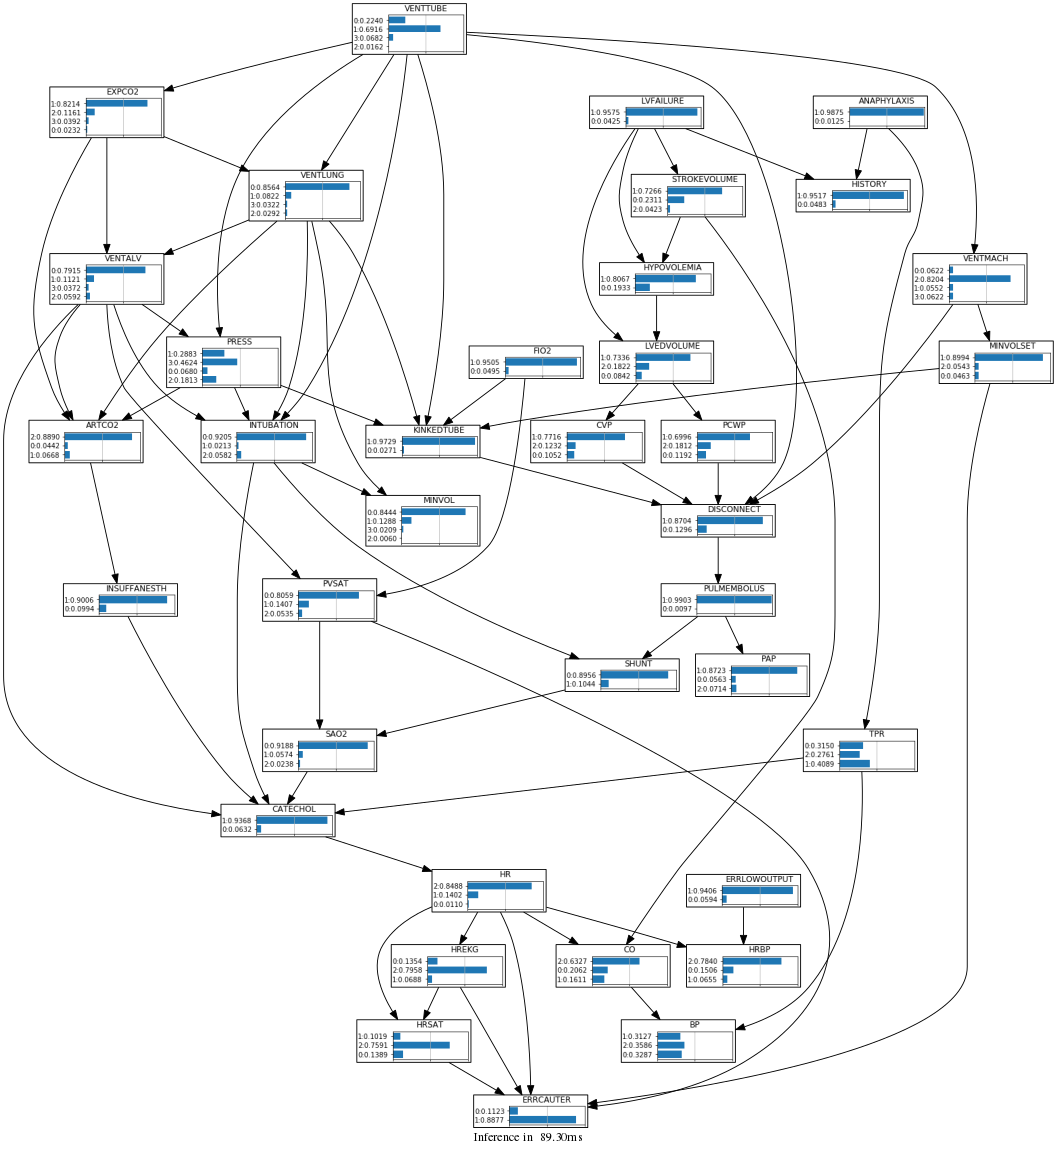

In [24]:
gnb.showInference(bn2,evs={},size="12")

# Two classifiers from the learned BN

In [25]:
print(bn2.variableFromName("HRSAT"))
print(bn2.variableFromName("INTUBATION"))

HRSAT<1,2,0>
INTUBATION<0,1,2>


 out/train.csv : [ ########################################################### ] 100%
 result in out/train.csv-roc_Learned_1.430913786s-HRSAT-1.png


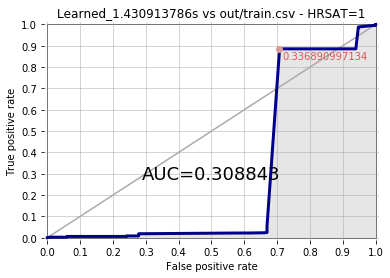

In [28]:
showROC(bn2,os.path.join("out","train.csv"),'HRSAT',"1",True,True) 

 out/train.csv : [ ########################################################### ] 100%
 result in out/train.csv-roc_Learned_1.430913786s-INTUBATION-0.png


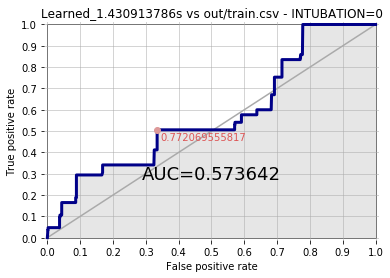

In [29]:
showROC(bn2,os.path.join("out","train.csv"),'INTUBATION',"0",True,True) 